### 1.1

In [233]:
from sklearn.datasets import load_digits

In [234]:
digits = load_digits()

In [235]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [236]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [237]:
print(target)

[0 1 2 ... 8 9 8]


In [238]:
import numpy as np
import matplotlib.pyplot as plt

In [239]:
target_array = np.array(target)
three_indices = np.where(target_array == 3)
three_index = three_indices[0][0]
three_image = images[three_index]

In [240]:
img = np.array(three_image)

In [241]:
assert 2 == len(img.shape)

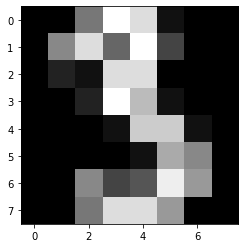

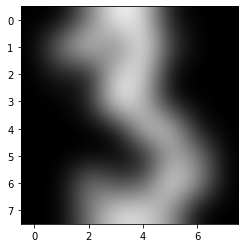

In [242]:
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.show()
plt.imshow(img, interpolation="bicubic")
plt.show()

In [243]:
from sklearn import model_selection

In [244]:
X_all = data
y_all = target
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, test_size = 0.4, random_state = 0)

### 1.2

In [245]:
def dist_loop(training, test):
    # training is N x D matrix
    N, D = training.shape
    # test is M x D matrix
    M, D = test.shape

    def euclid(x1, x2):
        return np.sqrt(np.sum(np.square(x1-x2)))

    result = np.empty([N, M])
    for n in range(N):
        train_element = training[n]
        for m in range(M):
            test_elem = test[m]

            result[n][m] = euclid(train_element, test_elem)


    return result


### 1.3

In [246]:
# Vectorisation with puther python loop
#def dist_vec(training, test):
#    # training is N x D matrix
#    N, D = training.shape
#    # test is M x D matrix
#    M, D = test.shape
#
#    result = np.empty([N, M])
#    for n in range(N):
#        train_element = training[n]
#        result[n] = np.sqrt(np.sum(np.square(test - train_element)))
#
#    return result


In [247]:
def dist_vec(training, test):
    squared_diff = np.square(training[:,None] - test)
    sum_diffs = np.sum(squared_diff, axis=2)
    result = np.sqrt(sum_diffs)
    return result

In [248]:
res1 = dist_loop(X_train, X_test)

In [259]:
res2 = dist_vec(X_train, X_test)

In [260]:
res1.shape

(1078, 719)

In [262]:
res2.shape

(1078, 719)

In [268]:
assert(np.sum(res1) == np.sum(res2))

### 1.4